## Rule based Intelligent Agent

In [76]:
grammar = """
句子 => 名词短语 动词短语 
名词短语 => 冠词 形容词* 名词
形容词* => null | 形容词 形容词*
动词短语 => 动词 名词短语
冠词 =>  一个 | 这个
名词 =>   男人 | 女人 |  篮球 | 桌子 | 小猫 
动词 => 看着 | 听见 | 看见
形容词 =>   蓝色的 |  好看的 | 小小的 |  年轻的 
"""

In [6]:
import random

concat = ''.join  # concat is the abbreviation of concatenate

def sentence(): return concat([noun_phrase(), verb_phrase()])
def noun_phrase(): return concat([article(), adj_star(), noun()])
def adj_star(): return concat([adj() for _ in range(random.randrange(5))]) 
# 5 is the maximum number of adj
def verb_phrase(): return concat([verb(), noun_phrase()])
def article(): return random.choice(['一个', '这个'])
def noun(): return random.choice(['男人', '女人', '篮球', '桌子', '小猫'])
def verb(): return random.choice(['看见', '听见', '看着'])
def adj(): return random.choice(['蓝色的', '好看的', '小小的', '年轻的'])

In [7]:
sentence()

'这个好看的好看的小小的桌子看着一个小小的好看的蓝色的篮球'

In [120]:
bank_host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 行为 具体业务
行为 = 办理 | 进行
具体业务 = 开户 | 存款 | 基金理财 | 密码
结尾 = 服务吗？"""

In [ ]:
X = [(W, Y), (Z)]

In [ ]:
def generate(X): return concat(random.choice(X)) 

In [38]:
def parser(string_rule, gen='->', split='|'): 
    """e.g @param is X -> W Y | Z
    the parser will generate {X: [(W, Y), (Z)]}
    """
    expression, statement = string_rule.split(gen)
    statement = [s.split() for s in statement.split(split)]
    return {expression.strip(): statement}

In [39]:
parser('X -> W Y | Z')

{'X': [['W', 'Y'], ['Z']]}

In [51]:
parser('二进制 = 0 || 1 || 二进制 二进制', gen='=', split='||')

{'二进制': [['0'], ['1'], ['二进制', '二进制']]}

In [41]:
def generate(rule, gene):
    return ''.join(random.choice(rule[gene]))

In [65]:
generate(parser('X -> W Y | Z'), 'X')

'WY'

In [60]:
generate(parser('二进制 = 0 || 1 || 二进制 二进制', gen='=', split='||'), '二进制')

'二进制二进制'

In [70]:
generate(parser('形容词 =>   蓝色的 |  好看的 | 小小的 |  年轻的', gen='=>'), '形容词')

'好看的'

In [71]:
def build_grammar(grammar_str,split="="):
    grammar_dict = {}
    l = []
    for line in grammar.split("\n"):
        if not line: continue
        stmt,expr = line.split(split)
        stmt = stmt.strip()
        expr = [e.split() for e in expr.split('|')]
        grammar_dict[stmt] = expr
    return grammar_dict

In [78]:
build_grammar(grammar, split='=>')

{'句子': [['名词短语', '动词短语']],
 '名词短语': [['冠词', '形容词*', '名词']],
 '形容词*': [['null'], ['形容词', '形容词*']],
 '动词短语': [['动词', '名词短语']],
 '冠词': [['一个'], ['这个']],
 '名词': [['男人'], ['女人'], ['篮球'], ['桌子'], ['小猫']],
 '动词': [['看着'], ['听见'], ['看见']],
 '形容词': [['蓝色的'], ['好看的'], ['小小的'], ['年轻的']]}

In [ ]:
def generate(string):
    return ''.join(generate(s) for s in random.choice(string))

In [79]:
def generate(target, grammar_dict):
    if target == 'null': # null 应该返回空字符串，而不是'null'
        return ''
    if target not in grammar_dict: return target
    expr = random.choice(grammar_dict[targetStmt])
    return ''.join([generate(e,grammar_dict) for e in expr])

In [88]:
def generate(target, grammar_dict):
    if target not in grammar_dict: return target
    # target 不在 grammar 的字典的键中，说明该 target 不能被继续扩展，我们之间返回它
    
    expr = random.choice(grammar_dict[target])  # 获得随机的表达式
    return ''.join([generate(e,grammar_dict) for e in expr if e != 'null'])

In [95]:
grammar_dict = {'句子': [['名词短语', '动词短语']],
 '名词短语': [['冠词', '形容词*', '名词']],
 '形容词*': [['null'], ['形容词', '形容词*']],
 '动词短语': [['动词', '名词短语']],
 '冠词': [['一个'], ['这个']],
 '名词': [['男人'], ['女人'], ['篮球'], ['桌子'], ['小猫']],
 '动词': [['看着'], ['听见'], ['看见']],
 '形容词': [['蓝色的'], ['好看的'], ['小小的'], ['年轻的']]}


In [102]:
generate('句子', grammar_dict)

'这个篮球看着这个好看的蓝色的桌子'

In [109]:
def parser(string_rule, gen='->', split='|'): 
    grammar_dict = {}
    l = []
    for line in string_rule.split("\n"):
        if not line: continue
        stmt,expr = line.split(gen)
        stmt = stmt.strip()
        expr = [e.split() for e in expr.split(split)]
        grammar_dict[stmt] = expr
    return grammar_dict

In [112]:
parser(bank_host, gen='=')

{'host': [['寒暄', '报数', '询问', '业务相关', '结尾']],
 '报数': [['我是', '数字', '号', ',']],
 '数字': [['单个数字'], ['数字', '单个数字']],
 '单个数字': [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']],
 '寒暄': [['称谓', '打招呼'], ['打招呼']],
 '称谓': [['人称', ',']],
 '人称': [['先生'], ['女士'], ['小朋友']],
 '打招呼': [['你好'], ['您好']],
 '询问': [['请问你要'], ['您需要']],
 '业务相关': [['行为']],
 '行为': [['办理'], ['进行']],
 '具体业务': [['开户'], ['存款'], ['基金理财'], ['密码']],
 '结尾': [['服务吗？']]}

In [115]:
def generate_from_grammar(grammar, target, gen='=>', split='|'):
    return generate(target, parser(grammar, gen=gen, split=split))

In [145]:
generate_from_grammar(grammar, '句子', gen='=>')

'这个男人看见这个小小的年轻的小猫'

## Search Based Intelligent Agent

In [1]:
BJ, SZ, GZ, WH, HEB, NY, CM, SG = '北京', '深圳', '广州', '武汉', '哈尔滨', '纽约', '清迈', '新加坡'

air_route = {
    BJ : {SZ, GZ, WH, HEB, NY}, 
    GZ : {WH, BJ, CM, SG},
    SZ : {BJ, SG},
    WH : {BJ, GZ},
    HEB : {BJ},
    CM : {GZ},
    NY : {BJ},
    SG : {GZ,SZ} 
}

In [3]:
%matplotlib inline

/anaconda3/envs/ibm/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


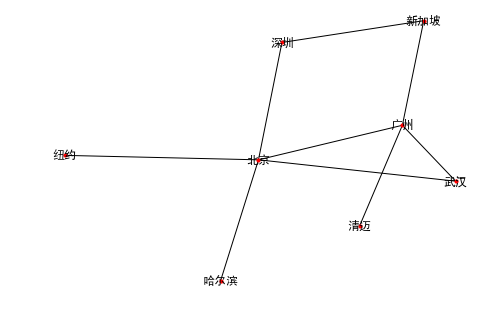

In [4]:
import networkx
air_route = networkx.Graph(air_route)
networkx.draw(air_route, with_labels=True, text_size=20, node_size=10)            

In [7]:
def search(graph,start):
    seen = set()
    need_visit = [start]
    while need_visit:
        node = need_visit.pop(0)
        if node not in seen:
            print ("I am looking at %s" % node)
            seen.add(node)
            new_discovered = list(graph[node])
            need_visit += new_discovered

In [9]:
search(air_route, BJ)

I am looking at 北京
I am looking at 广州
I am looking at 哈尔滨
I am looking at 深圳
I am looking at 纽约
I am looking at 武汉
I am looking at 新加坡
I am looking at 清迈


In [10]:
def search_pathes(graph,start,destination,all_path=True):
    """the @param start and @param destination are variable to specify which vertex we start. """
    seen = set()
    pathes = [[start]] # 增加一个变量，与search 程序类似，但是每一个元素不是单个节点，而是一条路径
    chosen_pathes = [] # 满足我们条件的路径
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if (not all_path) and (frontier in seen): continue # all_path为False时，只会得到最短路径
        seen.add(frontier)
        for city in graph[frontier]:
            if city in path: continue # 避免搜索到 类似NY-BJ-NY 的path
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination:  # 是否探索到我们的目标
                chosen_pathes.append(new_path)
    return chosen_pathes

In [21]:
def draw_route(pathes): return '\n'.join(' ✈️ -> '.join(path) for path in pathes)


In [22]:
print(draw_route(search_pathes(air_route, HEB, GZ)))

哈尔滨 ✈️ -> 北京 ✈️ -> 广州
哈尔滨 ✈️ -> 北京 ✈️ -> 武汉 ✈️ -> 广州
哈尔滨 ✈️ -> 北京 ✈️ -> 深圳 ✈️ -> 新加坡 ✈️ -> 广州


## Probability Based Intelligent Agent

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import tarfile

#uncompressed_file = tarfile.open('80k.tar.gz')
#uncompressed_file.extractall()
news_content = open('80k_articles.txt').read()

In [63]:
news_content[:200]

'新华社照片，东莞（广东），2017年4月7日\\n（体育）（9）篮球——CBA总决赛第四场：广东对阵新疆\\n4月7日，广东东莞银行队球员易建联在比赛中扣篮。\\n当日，在2016-2017赛季中国男子篮球职业联赛（CBA）总决赛第四场比赛中，广东东莞银行队主场迎战新疆喀什古城队。\\n新华社记者孟永民摄\\n\u3000\u3000新华社北京４月１４日新媒体专电（记者杨烨）作为国民经济的重要支柱，央企一季度交上了一份漂亮的“'

In [64]:
import re

def tokenize(string): 
    return ''.join(re.findall('[\w|\d]+', string)) # vk'k

In [65]:
tokenize('\u3000\u3000新华社华盛顿４月１３日电（记者林小春）寻找外星生命，目前最理想的地点可能是土星卫星土卫二上的冰封小世界。')

'新华社华盛顿４月１３日电记者林小春寻找外星生命目前最理想的地点可能是土星卫星土卫二上的冰封小世界'

In [66]:
import jieba

all_text_words = list(jieba.cut(tokenize(news_content)))

In [67]:
all_text_words[:10]

['新华社', '照片', '东莞', '广东', '2017', '年', '4', '月', '7', '日']

In [71]:
from collections import Counter
from functools import reduce
import operator as op

In [72]:
from collections import Counter

num_counts = Counter([1, 2, 2, 3, 1, 2, 5, 6, 5])

In [74]:
num_counts.most_common()

[(2, 3), (1, 2), (5, 2), (3, 1), (6, 1)]

In [78]:
import operator as op

reduce(lambda a, b: a + b, range(1, 101)) == reduce(op.add, range(1, 101))
#True

True

In [87]:
word_counts = Counter(all_text_words)

def get_words_1_gram_prob(word):
    """获得某一个单词的概率"""
    return word_counts[word] / len(all_text_words)


def get_1_gram_string_prob(words):
    """使用 reduce 函数获得单个概率的连乘概率"""
    return reduce(op.mul, [get_words_1_gram_prob(w) for w in words])

In [80]:
get_words_1_gram_prob('你好')

4.990318143018168e-06

In [85]:
get_words_1_gram_prob('非凡')

7.293541901334245e-06

In [84]:
get_words_1_gram_prob('经常')

9.283271314768412e-05

In [89]:
def cut(s): return list(jieba.cut(s))

In [92]:
get_1_gram_string_prob(cut('这是一个比较正常的句子'))

6.096154456004725e-22

In [93]:
get_1_gram_string_prob(cut('这是一个比较罕见的句子'))

1.815398937266113e-22

In [94]:
get_1_gram_string_prob(cut('杭州有一个地方叫西湖'))

1.934640052079795e-22

In [95]:
get_1_gram_string_prob(cut('广州有一个地方叫沥窖'))

2.950269728523436e-30

In [111]:
get_1_gram_string_prob(cut('小明毕业于清华大学'))

2.699586189254398e-18

In [112]:
get_1_gram_string_prob(cut('小明毕业于秦华大学'))

5.867853659716647e-24

In [175]:
need_compared = [
        "明天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
        "真事一只好看的小猫  真是一只好看的小猫",
        "我去吃火锅，今晚      我今晚去吃火锅"
]

def get_result_from_sentences(sentences):
    for s in sentences:
        s1, s2 = s.split()
        p1, p2 = get_1_gram_string_prob(cut(tokenize(s1))), get_1_gram_string_prob(cut(tokenize(s2)))

        better = s1 if p1 > p2 else s2
        print('{} is a more possible sentence'.format(better))
        print('-'*4+"{} with probability {}".format(s1, p1))
        print('-'*4+"{} with probability {}".format(s2, p2))


In [176]:
get_result_from_sentences(need_compared)

明天晚上请你吃大餐，我们一起吃苹果 is a more possible sentence
----明天晚上请你吃大餐，我们一起吃日料 with probability 7.152213836414146e-44
----明天晚上请你吃大餐，我们一起吃苹果 with probability 7.187974905596217e-41
真是一只好看的小猫 is a more possible sentence
----真事一只好看的小猫 with probability 2.5410177006044247e-25
----真是一只好看的小猫 with probability 1.1643334144572999e-21
我今晚去吃火锅 is a more possible sentence
----我去吃火锅，今晚 with probability 8.427110808034184e-19
----我今晚去吃火锅 with probability 8.427110808034186e-19


In [123]:
all_2_gram_words = [''.join(all_text_words[i:i+2]) for i in range(len(all_text_words)-2)]
word_count_2_gram = Counter(all_2_gram_words)

In [129]:
all_2_gram_words[:6]

['新华社照片', '照片东莞', '东莞广东', '广东2017', '2017年', '年4']

In [138]:
def get_words_2_gram_prob(word1, word2):
    """获得某一个词组的概率"""
    if word1 + word2 in word_count_2_gram:
        return word_count_2_gram[word1 + word2] / len(all_2_gram_words)
    else:
        return (get_words_1_gram_prob(word1) + get_words_1_gram_prob(word2)) / 2

In [132]:
get_words_2_gram_prob('我', '今天')

1.6634395938545887e-06

In [179]:
def get_2_gram_string_prob(words):
    """Gets the sentence proabbility by 2-gram model"""
    probabilities = []
    
    for i in range(len(words)-1):
        w1, w2 = words[i], words[i+1]
        probabilities.append(get_words_2_gram_prob(w1, w2))
    
    return reduce(op.mul, probabilities)
        

def get_2_gram_result_from_sentences(sentences):
    """Compares the results of our sentences. """
    for s in sentences:
        s1, s2 = s.split()
        p1, p2 = get_2_gram_string_prob(cut(tokenize(s1))), get_2_gram_string_prob(cut(tokenize(s2)))

        better = s1 if p1 > p2 else s2
        print('{} is a more possible sentence'.format(better))
        print('-'*4+"{} with probability {}".format(s1, p1))
        print('-'*4+"{} with probability {}".format(s2, p2))

In [180]:
get_2_gram_result_from_sentences(need_compared)

明天晚上请你吃大餐，我们一起吃日料 is a more possible sentence
----明天晚上请你吃大餐，我们一起吃日料 with probability 1.4578520874467007e-43
----明天晚上请你吃大餐，我们一起吃苹果 with probability 4.960790383628831e-46
真是一只好看的小猫 is a more possible sentence
----真事一只好看的小猫 with probability 8.393562491686215e-25
----真是一只好看的小猫 with probability 6.012110215869111e-21
我今晚去吃火锅 is a more possible sentence
----我去吃火锅，今晚 with probability 2.6799687241646258e-15
----我今晚去吃火锅 with probability 5.238120688139951e-15


In [182]:
import pandas as pd

titanic_content = pd.read_csv(open('../../datasource/titanic_train.csv'))
titanic_content.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


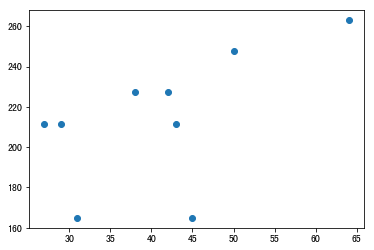

In [188]:
age_with_fare = titanic_content[['Age', 'Fare']]
age_with_fare = age_with_fare[ (age_with_fare['Age'] > 25) & (age_with_fare['Fare'] < 450) & 
                              (age_with_fare['Fare'] > 160)]
age = age_with_fare['Age']
fare = age_with_fare['Fare']
plt.scatter(age, fare)
plt.show()

In [189]:
import random

In [192]:
minmum, maximum = -99999, 999999

In [196]:
def loss(y_hat, y):
    assert len(y_hat) == len(y)
    return sum(abs(y_hat_i - y_i) for y_hat_i, y_i in zip(y_hat, y)) / len(y_hat)

In [197]:
loss([100, 200], [-100, 300])

150.0

In [199]:
loss(y_hat=[100.1, 201, 199], y=[100, 200, 200])

0.6999999999999981

In [202]:
import numpy as np

def loss(y_hat, y): 
    return np.mean(np.abs(y_hat - y))

In [205]:
loss(np.array([100.1, 201, 199]), np.array([100, 200, 200]))

0.6999999999999981

In [233]:
total = 100

age = age_with_fare['Age']
fare = age_with_fare['Fare']


def get_best_parameters(total_generated):
    min_loss = float('inf')
    best_k, best_b = None, None

    while total_generated > 0: 
        k, b = random.randint(minmum, maximum), random.randint(minmum, maximum)
        fare_hats = k * age + b
        current_loss = loss(fare, fare_hats)
        if current_loss < min_loss: 
            min_loss = current_loss
            best_k, best_b = k, b
     
        total_generated -= 1

    print('best loss is {}'.format(min_loss))
    print('-- with k: {}, b: {}'.format(best_k, best_b))
    
    return min_loss, best_k, best_b

In [269]:
directions = {(-1, +1), (+1, -1), (-1, -1), (+1, +1)}
d = random.choice(list(directions))

In [251]:
a = {1, 2, 3}

In [318]:
def get_best_parameters_with_supervised(total_generated):
    min_loss = float('inf')
    best_k, best_b = None, None
    
    k, b = 1, 1
    
    step = 1
    
    directions = {(-1, +1), (+1, -1), (-1, -1), (+1, +1)}
    d = random.choice(list(directions))
    
    while total_generated > 0:
        k += step * d[0]; b += step * d[1]
        fare_hats = k * age + b
        current_loss = loss(fare, fare_hats)
        
        if current_loss < min_loss: 
            min_loss = current_loss
        else:
            d = random.choice(list(set(direction) - {d}))
            # the next direction will be random a new direcion
            # and this diretion not is the current direction
     
        total_generated -= 1

    print('best loss is {}'.format(min_loss))
    print('-- with k: {}, b: {}'.format(k, b))
    
    return min_loss, k, b

In [322]:
get_best_parameters_with_supervised(100)

best loss is 35.78102222222222
-- with k: 3, b: 17


(35.78102222222222, 3, 17)

In [295]:
get_best_parameters(30)

best loss is 35.78102222222222
-- with k: 5, b: 9


(35.78102222222222, 5, 9)

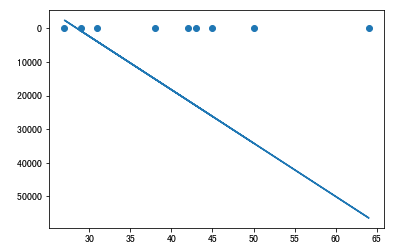

In [329]:
fare_hats = -1590 * age + 45356
plt.scatter(age, fare)
plt.plot(age, fare_hats)

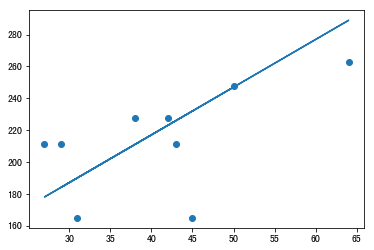

In [324]:
fare_hats = 3 * age + 97
plt.scatter(age, fare)
plt.plot(age, fare_hats)

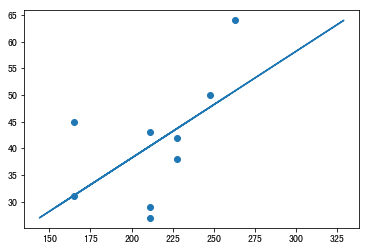

In [296]:
fare_hats = 5 * age + 9
plt.scatter(fare, age)
plt.plot(fare_hats, age)

In [237]:
Ns = [10, 100, 1000, 10000, 100000, 1000000]
losses = [get_best_parameters(total_generated=n)[0] for n in Ns]
plt.plot(Ns, lossess)

best loss is 590011.6134222221
-- with k: -2894, b: 708880
best loss is 174732.95137777776
-- with k: -16190, b: 771259
best loss is 18018.057866666662
-- with k: -1191, b: 64371
best loss is 13119.613422222223
-- with k: 348, b: -934
best loss is 4884.386577777777
-- with k: 33, b: -6023
best loss is 786.3865777777778
-- with k: -44, b: 1232


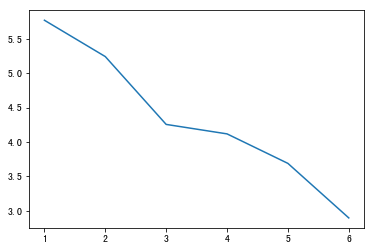

In [247]:
plt.plot(np.log10(Ns), np.log10(losses))